
Perform analysis on the transferability score 


In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from statistics import median

In [2]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is taken as the 
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is taken as the \n'

In [3]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")
summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
summary_df = pd.read_csv(summary_path, header=0, index_col=0)
label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [19]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_source_f1','transfer_score','w_dist'])
stat_df = stat_df.set_index('label_code')

ret = []
transfer_scores = []
w_dists = []
trans_source_f1s = []
for code in label_codes:
    code_path = os.path.join(output_dir, "exp3_"+code+"_score.csv")
    code_df = pd.read_csv(code_path, header=0, index_col=0)
    if 'w_dist' in code_df.columns:
        stat_df.at[code, 'transfer_score'] = median(list(code_df['transfer_score']))
        stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
        stat_df.at[code, 'trans_source_f1'] = median(list(code_df['trans_source_f1']))
        transfer_scores.extend(list(code_df['transfer_score']))
        w_dists.extend(list(code_df['w_dist']))
        trans_source_f1s.extend(list(code_df['trans_source_f1']))


In [22]:
stat_df.shape

(174, 3)

In [23]:
# plt.figure()
# plt.scatter(list(stat_df['w_dist']), list(stat_df['trans_source_f1']), s=1)
# plt.xlabel('Wasserstein distance')
# plt.ylabel('f1 score')
# plt.show()

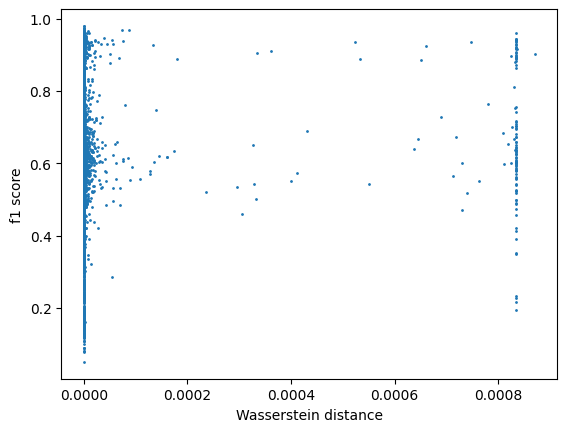

In [24]:
plt.figure()
plt.scatter(w_dists, trans_source_f1s, s=1)
plt.xlabel('Wasserstein distance')
plt.ylabel('f1 score')
plt.show()

In [25]:
# plt.figure()
# plt.scatter(list(stat_df['transfer_score']), list(stat_df['trans_source_f1']), s=1)
# plt.xlabel('transfer score')
# plt.ylabel('f1 score')
# plt.show()

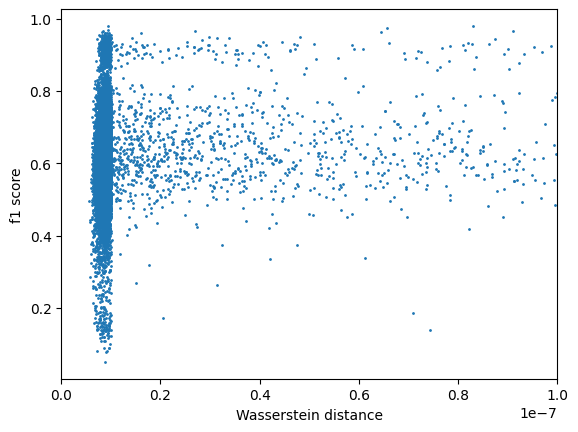

In [26]:
plt.figure()
plt.scatter(w_dists, trans_source_f1s, s=1)
plt.xlabel('Wasserstein distance')
plt.ylabel('f1 score')
plt.xlim(0.00000, 1e-7)
plt.show()

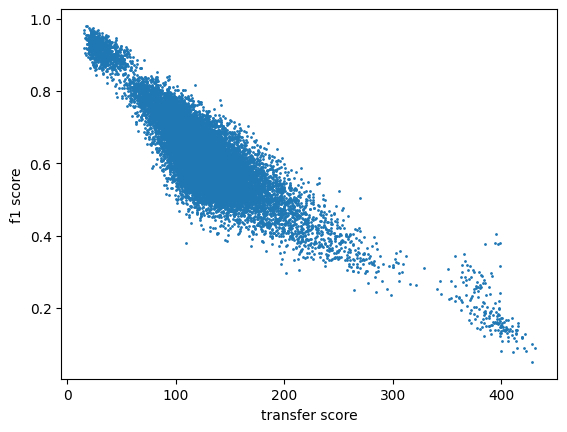

In [27]:
plt.figure()
plt.scatter(transfer_scores, trans_source_f1s, s=1)
plt.xlabel('transfer score')
plt.ylabel('f1 score')
plt.show()

In [28]:
transfer_scores = [1/x for x in transfer_scores]
w_dists = [1/x for x in w_dists]

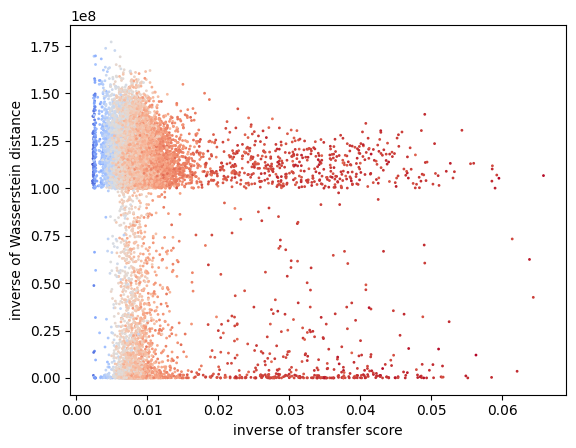

In [29]:
# plt.ylim(0.75*1e-8, 1.25*1e-8)
# plt.scatter(list(stat_df['transfer_score']), list(stat_df['w_dist']), s=1, c=list(stat_df['trans_source_f1']), cmap=plt.cm.coolwarm)
plt.figure()
plt.scatter(transfer_scores, w_dists, s=1, c=trans_source_f1s, cmap=plt.cm.coolwarm)
# warmer color indicates better f1
plt.xlabel('inverse of transfer score')
plt.ylabel('inverse of Wasserstein distance')

plt.show()